#### **MBD 2022-2023**
# **Fundamentals of Deep Learning**

## **Final project**


In [ ]:
#Import libraries
# For ANN
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Flatten, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
import numpy as np
from PIL import Image
from glob import iglob
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec


# for CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K

# For model visualisation
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 KB 26.6 MB/s eta 0:00:00


In [ ]:
#CHECK GPU
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


#**Data Preparation**



##**Importing Dataset**

In [ ]:
# Import data
!wget https://github.com/mghatee/Accident-Images-Analysis-Dataset/blob/master/Accident%20Images%20Analysis%20Dataset.rar?raw=true -O data.rar

--2023-03-24 09:48:10--  https://github.com/mghatee/Accident-Images-Analysis-Dataset/blob/master/Accident%20Images%20Analysis%20Dataset.rar?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mghatee/Accident-Images-Analysis-Dataset/raw/master/Accident%20Images%20Analysis%20Dataset.rar [following]
--2023-03-24 09:48:11--  https://github.com/mghatee/Accident-Images-Analysis-Dataset/raw/master/Accident%20Images%20Analysis%20Dataset.rar
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mghatee/Accident-Images-Analysis-Dataset/master/Accident%20Images%20Analysis%20Dataset.rar [following]
--2023-03-24 09:48:11--  https://raw.githubusercontent.com/mghatee/Accident-Images-Analysis-Dataset/master/Accident%20Images%20Analysis%20Dataset.rar
Resolving ra

In [ ]:
# Unzip the files read above 
!unrar x -o+ -y -inul data.rar

In [ ]:
# FUnction to prepare data to use in building neural networks
basepath = 'Accident Images Analysis Dataset/'

def prepare_images(path, num_classes,  load_img_kwargs={}, ext='.jpg'):
  X, y = [], []
  for class_ in range(num_classes):
    for img_path in iglob(path + str(class_ + 1) + '/' + '*' + ext):
      img = image.load_img(img_path, **load_img_kwargs)
      x = image.img_to_array(img)
      X.append(x)
      y.append(class_)
  return np.array(X), np.array(y)

##**Data Pre-Processing and Normalisation**

In [ ]:
# Use above fucntion to prepare data 
X, y = prepare_images(basepath + 'Vehicles-in-Accidents/', 3,  load_img_kwargs={'target_size': (224, 224)})

len(X), len(y), np.unique(y)

(2636, 2636, array([0, 1, 2]))

In [ ]:
# Check shape 
X.shape

(2636, 224, 224, 3)

In [ ]:
#Reference: https://cloudxlab.com/assessment/displayslide/2533/numpy-arrays-example-reshaping-a-complex-array


In [ ]:
#Check shape of one of the images in dataset
X[800].shape 

(224, 224, 3)

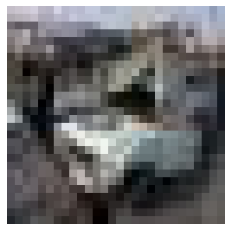

Label = 0


In [ ]:
# Random check of one of the observations 
plt.axis('off')
plt.imshow(X[800].astype('uint8'), cmap='gray')
plt.show()
print('Label =', y[800])

In [ ]:
# From above we can see that images are colored, so we will convert them to into black and white using greyscale
image_grayscale = X[800].mean(axis=2).astype(np.float32)

In [ ]:
# Check size of these greyscaled images
image_grayscale.shape

(224, 224)

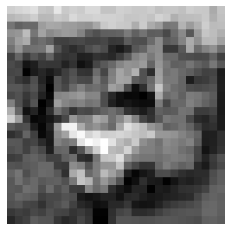

Label = 0


In [ ]:
# Verify above change 
plt.axis('off')
plt.imshow(image_grayscale, cmap='gray')
plt.show()
print('Label =', y[800])

In [ ]:
# Calculate the mean of RGB channels and store the result 
lst = []

for image in range(len(X)):
  image_grayscale = X[image].mean(axis=2).astype(np.float32)
  lst.append(image_grayscale)

In [ ]:
# Check greysclaed images 
X_grey = np.asarray(lst)
X_grey.shape

(2636, 224, 224)

In [ ]:
# Check number of images
len(X),len(X_grey)

(2636, 2636)

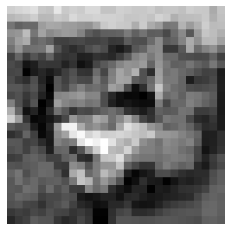

Label = 0


In [ ]:
# Print one of the images in 'y'
plt.axis('off')
plt.imshow(X_grey[800], cmap='gray')
plt.show()
print('Label =', y[800])

In [ ]:
# Split the dataset into train and test datasets 
X_train, X_test, y_train, y_test = train_test_split(X_grey, y, test_size=0.33, random_state=42)
print(len(X_train), len(y_train), len(X_test), len(y_test))

1766 1766 870 870


In [ ]:
# Change datatypes and standardize data 
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')

X_train /= 255 
X_test  /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0],  'test samples')

1766 train samples
870 test samples


In [ ]:
# One-hot encode the outputs, as we're going to create 3 output neurons which each will give an output between 0 and 1.

num_classes = 3

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print('Initial label = ', y_train[0])
print('First label is now = ', y_train[0])

Initial label =  [0. 0. 1.]
First label is now =  [0. 0. 1.]


#**Multiple Layers Perception (MLP) Network**

In [ ]:
# Start with a simple MLP model
model = Sequential()
model.add(Flatten(input_shape=(224, 224)))
model.add(Dense(300, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 300)               15053100  
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 3)                 903       
                                                                 
Total params: 15,144,303
Trainable params: 15,144,303
Non-trainable params: 0
_________________________________________________________________


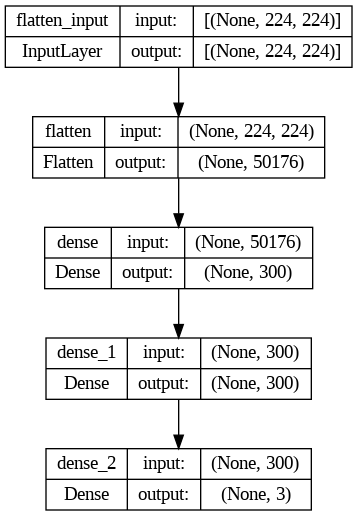

In [ ]:
# Plot model architecture 

from tensorflow.keras.utils import plot_model

# Assuming 'model' is the name of your model
plot_model(model, to_file='model_architecture.png', show_shapes=True)

The next step is then to compile our model.

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# FIt model on training data and define bacth size, epochs

batch_size  = 50
epochs      = 30

model.fit(
  X_train, y_train,
  batch_size=batch_size,
  epochs=epochs,
  verbose=0,
  validation_data=(X_test, y_test))


In [ ]:
# Evaluate the model performance with accuracy scores 
score = model.evaluate(X_test, y_test, verbose=0)

print("Train loss:", score[0])
print("Train accuracy:", score[1])
print('Test loss:',     score[0])
print('Test accuracy:', score[1])

Train loss: 1.0071340799331665
Train accuracy: 0.5103448033332825
Test loss: 1.0071340799331665
Test accuracy: 0.5103448033332825


In [ ]:
# Plot accuracry scores 


In [ ]:
# model 2 with extra dense layers and new function to check if this imprioves model's performace
model = Sequential()
model.add(Flatten(input_shape=(224, 224)))
model.add(Dense(300, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 50176)             0         
                                                                 
 dense_3 (Dense)             (None, 300)               15053100  
                                                                 
 dense_4 (Dense)             (None, 300)               90300     
                                                                 
 dense_5 (Dense)             (None, 300)               90300     
                                                                 
 dense_6 (Dense)             (None, 3)                 903       
                                                                 
Total params: 15,234,603
Trainable params: 15,234,603
Non-trainable params: 0
_________________________________________________________________


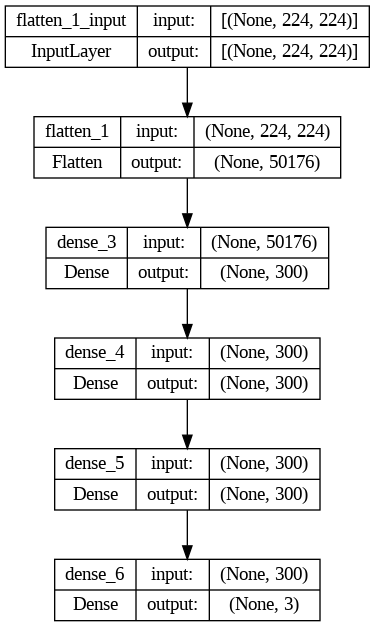

In [ ]:
# Plot model architecture 

from tensorflow.keras.utils import plot_model

# Assuming 'model' is the name of your model
plot_model(model, to_file='model_architecture.png', show_shapes=True)

In [ ]:
# Complile the model 
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# FIt model on training data and define bacth size, epochs

batch_size  = 50
epochs      = 30

model.fit(
  X_train, y_train,
  batch_size=batch_size,
  epochs=epochs,
  verbose=0,
  validation_data=(X_test, y_test))

In [ ]:
# Evaluate the model performance with accuracy scores 

score = model.evaluate(X_test, y_test, verbose=0)

print("Train loss:", score[0])
print("Train accuracy:", score[1])
print('Test loss:',     score[0])
print('Test accuracy:', score[1])

Train loss: 1.09905207157135
Train accuracy: 0.33563217520713806
Test loss: 1.09905207157135
Test accuracy: 0.33563217520713806


In [ ]:
# model 3 with extra dense layers and two different activation fucntions 'relu' and 'sigmoid' to check if this imprioves model's performace
model = Sequential()
model.add(Flatten(input_shape=(224, 224)))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(300, activation='sigmoid'))
model.add(Dense(300, activation='sigmoid'))
model.add(Dense(300, activation='sigmoid'))
model.add(Dense(300, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 50176)             0         
                                                                 
 dense_7 (Dense)             (None, 500)               25088500  
                                                                 
 dense_8 (Dense)             (None, 500)               250500    
                                                                 
 dense_9 (Dense)             (None, 500)               250500    
                                                                 
 dense_10 (Dense)            (None, 300)               150300    
                                                                 
 dense_11 (Dense)            (None, 300)               90300     
                                                                 
 dense_12 (Dense)            (None, 300)              

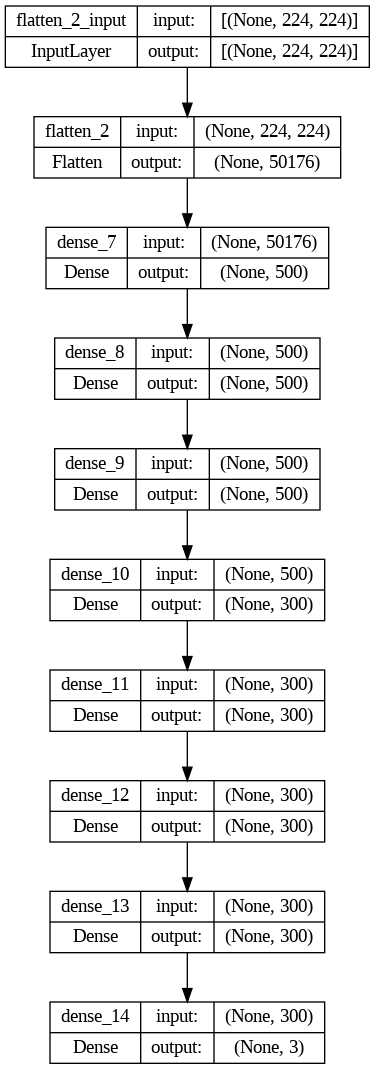

In [ ]:
# Plot model architecture 

from tensorflow.keras.utils import plot_model

# Assuming 'model' is the name of your model
plot_model(model, to_file='model_architecture.png', show_shapes=True)

In [ ]:
# Complile model 
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# FIt model on training data and define bacth size, epochs

batch_size  = 50
epochs      = 30

model.fit(
  X_train, y_train,
  batch_size=batch_size,
  epochs=epochs,
  verbose=0,
  validation_data=(X_test, y_test))

In [ ]:
# Evaluate the model performance with accuracy scores 
score = model.evaluate(X_test, y_test, verbose=0)

print("Train loss:", score[0])
print("Train accuracy:", score[1])
print('Test loss:',     score[0])
print('Test accuracy:', score[1])

Train loss: 1.3298321962356567
Train accuracy: 0.31954023241996765
Test loss: 1.3298321962356567
Test accuracy: 0.31954023241996765


In [ ]:
# model 4  with same number of layers and activation functions as previous midel, but with a change of fucntion in output layer. Changing outpu laer's activation fucntion 
# from 'softmax' to 'sigmoid'
model = Sequential()
model.add(Flatten(input_shape=(224, 224)))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(300, activation='sigmoid'))
model.add(Dense(300, activation='sigmoid'))
model.add(Dense(300, activation='sigmoid'))
model.add(Dense(300, activation='sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 50176)             0         
                                                                 
 dense_15 (Dense)            (None, 500)               25088500  
                                                                 
 dense_16 (Dense)            (None, 500)               250500    
                                                                 
 dense_17 (Dense)            (None, 500)               250500    
                                                                 
 dense_18 (Dense)            (None, 300)               150300    
                                                                 
 dense_19 (Dense)            (None, 300)               90300     
                                                                 
 dense_20 (Dense)            (None, 300)              

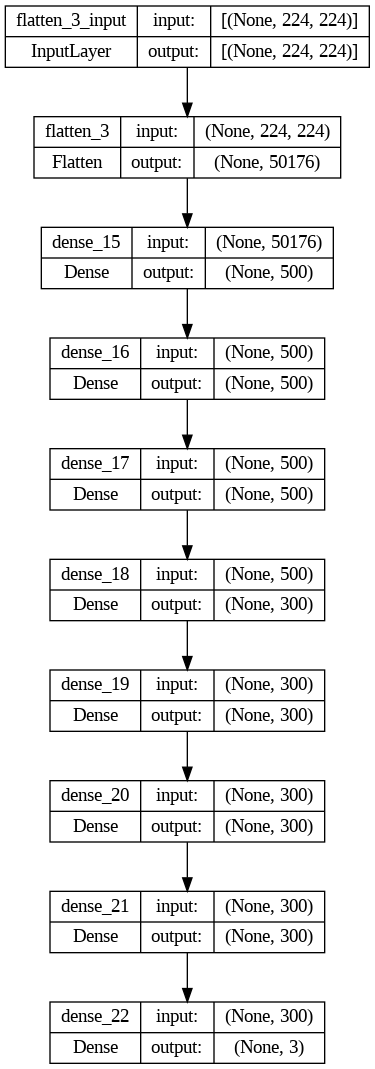

In [ ]:
# Plot model architecture 

from tensorflow.keras.utils import plot_model

# Assuming 'model' is the name of your model
plot_model(model, to_file='model_architecture.png', show_shapes=True)

In [ ]:
# Compile the model 
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# FIt model on training data and define bacth size, epochs
batch_size  = 50
epochs      = 30

model.fit(
  X_train, y_train,
  batch_size=batch_size,
  epochs=epochs,
  verbose=0,
  validation_data=(X_test, y_test))

In [ ]:
# Evaluate model performance 
score = model.evaluate(X_test, y_test, verbose=0)

print("Train loss:", score[0])
print("Train accuracy:", score[1])
print('Test loss:',     score[0])
print('Test accuracy:', score[1])

Train loss: 1.304103970527649
Train accuracy: 0.4045976996421814
Test loss: 1.304103970527649
Test accuracy: 0.4045976996421814
